In [13]:
import os
import torch
import ot

parent_path='/home/baly/projects/linear_pgw'

os.chdir(parent_path)
from lib.opt import *
from lib.gromov_test import *   

import numpy as np 
import numba as nb
import warnings
import time
from ot.backend import get_backend, NumpyBackend
from ot.lp import emd


In [15]:
# load data 
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
def data_process(name='MNIST'):
    # open the data file 
    if name in ['MNIST','EMNIST']:
        data_file=torch.load('pu_learning/data/'+name+'.pt')
        (X,l)=data_file
        classes=None
    elif 'surf' in name or 'decaf' in name:        
        with open('pu_learning/data/'+name+'_fts.pkl', 'rb') as f:
            data_file = pickle.load(f)
     
        if 'surf' in name:
            X0=data_file['features']
            l=data_file['labels']
            pca = PCA(n_components=10, random_state=0)
            pca.fit(X0.T)
            X = pca.components_.T
            classes=data_file['classes']
        elif 'decaf' in name:

            X0=data_file['fc8']
            l=data_file['labels']
            classes=data_file['classes']
            pca = PCA(n_components=40, random_state=0)
            pca.fit(X0.T)
            X = pca.components_.T
    return (X,l),classes
        


from sklearn import manifold
# Select a subset of classes

name='MNIST'
(x,l),classes=data_process(name=name)


selected_classes = np.arange(0,10) #np.random.choice(range(max(l)), 15, replace=False) #np.arange(0,10) #np.random.randint(0,10,6) # #np.random.randint(0,20,10)  # Replace with your chosen class indices
mask = np.isin(l, selected_classes)

# Filter the data
x_subset = x[mask]
l_subset = l[mask]

# Apply t-SNE to the subset
tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
x_2d_subset = tsne.fit_transform(x_subset)




EMNIST_classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
          'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
          'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
          'U', 'V', 'W', 'X', 'Y', 'Z',
          'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
          'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't' 
          'u','v', 'w', 'x', 'y', 'z']


print('checked')

checked


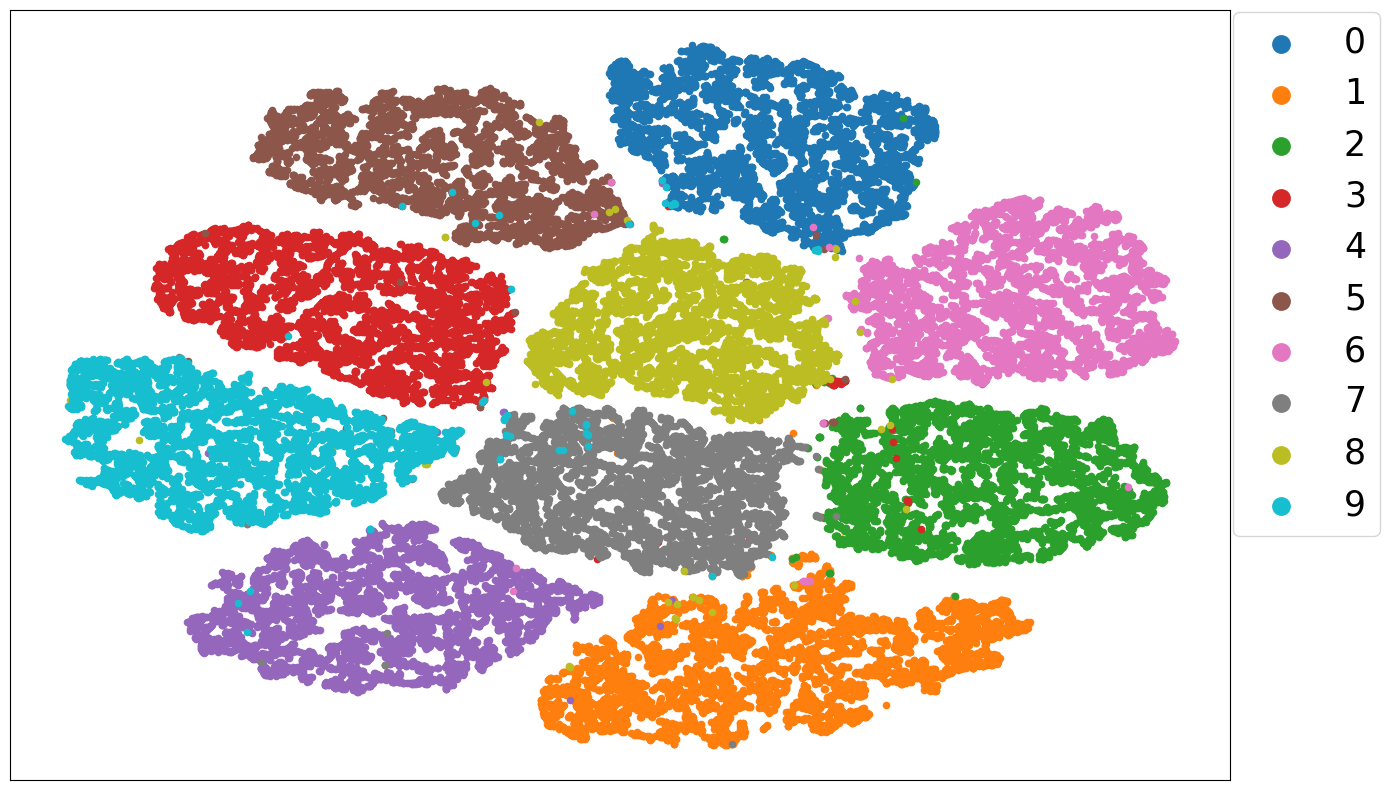

In [16]:

# Iterate over each class in the selected_classes and plot them separately
fig = plt.figure(figsize=(14, 8), tight_layout=True)  # Use tight_layout to reduce blank space
for class_index in np.unique(l_subset):
    # Select data points that belong to the current class
    indices = l_subset == class_index
    plt.scatter(x_2d_subset[indices, 0], x_2d_subset[indices, 1], label=EMNIST_classes[class_index], s=20)
#
plt.legend(bbox_to_anchor=(0.988, 1.02), loc='upper left',fontsize=25,markerscale=2.8)

# Remove x and y ticks
plt.xticks([])
plt.yticks([])

# Save the plot as image and PDF
plt.savefig('pu_learning/result/data_plot_ashkan/'+name+'.png', dpi=200,bbox_inches='tight')
plt.savefig('pu_learning/result/data_plot_ashkan/'+name+'.pdf', dpi=200,bbox_inches='tight')
plt.savefig('pu_learning/result/data_plot_ashkan/'+name+'.jpg', dpi=200,bbox_inches='tight')
# Show the plot
plt.show()

In [ ]:
l_subset

In [ ]:
mask.shape

In [ ]:
%time Gamma2,_=opt_lp2(p,q,C,Lambda=0)